# Youtube Streamer Analysis


## Data Preprocessing

### Importing Libraries

In [114]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Load Datasets


In [2]:
df = pd.read_csv('youtubers_df.csv')

In [3]:
df.shape

(1000, 9)

In [4]:
df.head()

,Rank,Username,Categories,Suscribers,Country,Visits,Likes,Comments,Links
0,1,tseries,Música y baile,249500000,India,86200.0,2700,78,http://youtube.com/channel/UCq-Fj5jknLsUf-MWSy...
1,2,MrBeast,"Videojuegos, Humor",183500000,Estados Unidos,117400000.0,5300000,18500,http://youtube.com/channel/UCX6OQ3DkcsbYNE6H8u...
2,3,CoComelon,Educación,165500000,Unknown,7000000.0,24700,0,http://youtube.com/channel/UCbCmjCuTUZos6Inko4...
3,4,SETIndia,NaN,162600000,India,15600.0,166,9,http://youtube.com/channel/UCpEhnqL0y41EpW2TvW...
4,5,KidsDianaShow,"Animación, Juguetes",113500000,Unknown,3900000.0,12400,0,http://youtube.com/channel/UCk8GzjMOrta8yxDcKf...


In [5]:
df.tail()

,Rank,Username,Categories,Suscribers,Country,Visits,Likes,Comments,Links
995,996,hamzymukbang,NaN,11700000,Estados Unidos,397400.0,14000,124,http://youtube.com/channel/UCPKNKldggioffXPkSm...
996,997,Adaahqueen,NaN,11700000,India,1100000.0,92500,164,http://youtube.com/channel/UCk3fFpqI5kDMf__mUP...
997,998,LittleAngelIndonesia,Música y baile,11700000,Unknown,211400.0,745,0,http://youtube.com/channel/UCdrHrQf0o0TO8YDntX...
998,999,PenMultiplex,NaN,11700000,India,14000.0,81,1,http://youtube.com/channel/UCObyBrdrtQ20BU9PxH...
999,1000,OneindiaHindi,Noticias y Política,11700000,India,2200.0,31,1,http://youtube.com/channel/UCOjgc1p2hJ4GZi6pQQ...


In [6]:
#Rename column name suscribers to subscribers
df.rename(columns = {'Suscribers' : 'Subscribers'}, inplace=True)

In [7]:
df.columns

Index(['Rank', 'Username', 'Categories', 'Subscribers', 'Country', 'Visits',
       'Likes', 'Comments', 'Links'],
      dtype='object')

### 1. Data Exploration

#### Start by exploring the dataset to understand its structure and identify key variables.
#### Check for missing data and outliers.

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Rank         1000 non-null   int64  
 1   Username     1000 non-null   object 
 2   Categories   694 non-null    object 
 3   Subscribers  1000 non-null   int64  
 4   Country      1000 non-null   object 
 5   Visits       1000 non-null   float64
 6   Likes        1000 non-null   int64  
 7   Comments     1000 non-null   int64  
 8   Links        1000 non-null   object 
dtypes: float64(1), int64(4), object(4)
memory usage: 70.4+ KB


In [9]:
df.isnull()

,Rank,Username,Categories,Subscribers,Country,Visits,Likes,Comments,Links
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,True,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
995,False,False,True,False,False,False,False,False,False
996,False,False,True,False,False,False,False,False,False
997,False,False,False,False,False,False,False,False,False
998,False,False,True,False,False,False,False,False,False


In [10]:
#Checking for null values
df.isnull().sum()

Rank             0
Username         0
Categories     306
Subscribers      0
Country          0
Visits           0
Likes            0
Comments         0
Links            0
dtype: int64

In [11]:
#Replace null value with Unknown
#df['Categories'].fillna('Unknown', inplace=True)

In [12]:
#impute null values with most frequent value(mode) or a specific value
mode_value = df['Categories'].mode()[0]
df['Categories'].fillna(mode_value, inplace=True)

In [13]:
#Drop Null Values
#df.dropna(inplace=True)

In [14]:
df.tail()

,Rank,Username,Categories,Subscribers,Country,Visits,Likes,Comments,Links
995,996,hamzymukbang,Música y baile,11700000,Estados Unidos,397400.0,14000,124,http://youtube.com/channel/UCPKNKldggioffXPkSm...
996,997,Adaahqueen,Música y baile,11700000,India,1100000.0,92500,164,http://youtube.com/channel/UCk3fFpqI5kDMf__mUP...
997,998,LittleAngelIndonesia,Música y baile,11700000,Unknown,211400.0,745,0,http://youtube.com/channel/UCdrHrQf0o0TO8YDntX...
998,999,PenMultiplex,Música y baile,11700000,India,14000.0,81,1,http://youtube.com/channel/UCObyBrdrtQ20BU9PxH...
999,1000,OneindiaHindi,Noticias y Política,11700000,India,2200.0,31,1,http://youtube.com/channel/UCOjgc1p2hJ4GZi6pQQ...


In [15]:
df.shape

(1000, 9)

In [16]:
df.isnull().sum()

Rank           0
Username       0
Categories     0
Subscribers    0
Country        0
Visits         0
Likes          0
Comments       0
Links          0
dtype: int64

In [17]:
#Change Data Type
df['Visits'] = df['Visits'].astype('int')

In [18]:
df['Visits'].dtypes

dtype('int32')

In [19]:
df.columns

Index(['Rank', 'Username', 'Categories', 'Subscribers', 'Country', 'Visits',
       'Likes', 'Comments', 'Links'],
      dtype='object')

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Rank         1000 non-null   int64 
 1   Username     1000 non-null   object
 2   Categories   1000 non-null   object
 3   Subscribers  1000 non-null   int64 
 4   Country      1000 non-null   object
 5   Visits       1000 non-null   int32 
 6   Likes        1000 non-null   int64 
 7   Comments     1000 non-null   int64 
 8   Links        1000 non-null   object
dtypes: int32(1), int64(4), object(4)
memory usage: 66.5+ KB


In [21]:
#describe() method return description of data in Dataframe(i.e. count, mean, standaed Deviation)
df.describe()

,Rank,Subscribers,Visits,Likes,Comments
count,1000.000000,1.000000e+03,1.000000e+03,1.000000e+03,1000.000000
mean,500.500000,2.189440e+07,1.209446e+06,5.363259e+04,1288.768000
std,288.819436,1.682775e+07,5.229942e+06,2.580457e+05,6778.188308
min,1.000000,1.170000e+07,0.000000e+00,0.000000e+00,0.000000
25%,250.750000,1.380000e+07,3.197500e+04,4.717500e+02,2.000000
50%,500.500000,1.675000e+07,1.744500e+05,3.500000e+03,67.000000
75%,750.250000,2.370000e+07,8.654750e+05,2.865000e+04,472.000000
max,1000.000000,2.495000e+08,1.174000e+08,5.300000e+06,154000.000000


#Use describe() for specific columns
df[['Rank', 'Comments']].describe()

In [22]:
#checking for duplicate values
df.duplicated().sum()

0

### Checking For Outliers


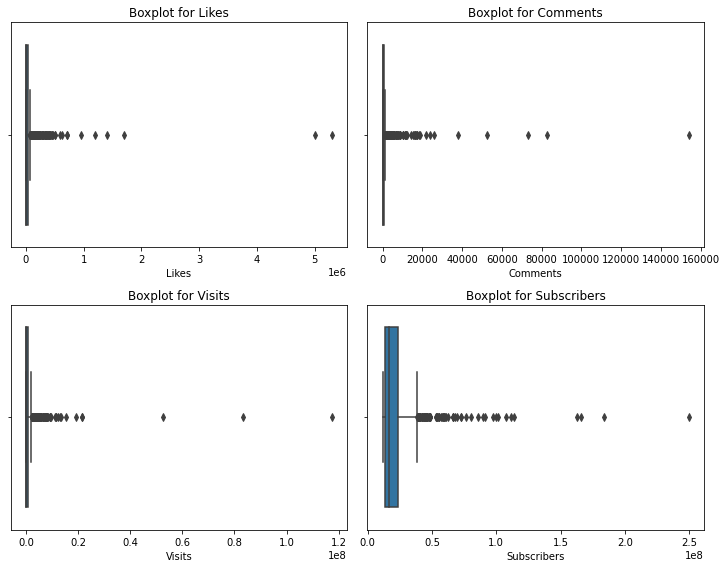

In [23]:
outliers = {'Subscribers', 'Visits','Likes','Comments'}
fig, axes = plt.subplots(2,2, figsize = (10, 8))
axes = axes.flatten()

for i , col in enumerate(outliers):
    sns.boxplot(x=df[col], ax=axes[i])
    axes[i].set_title(f'Boxplot for {col}')
    
plt.tight_layout()
plt.show()

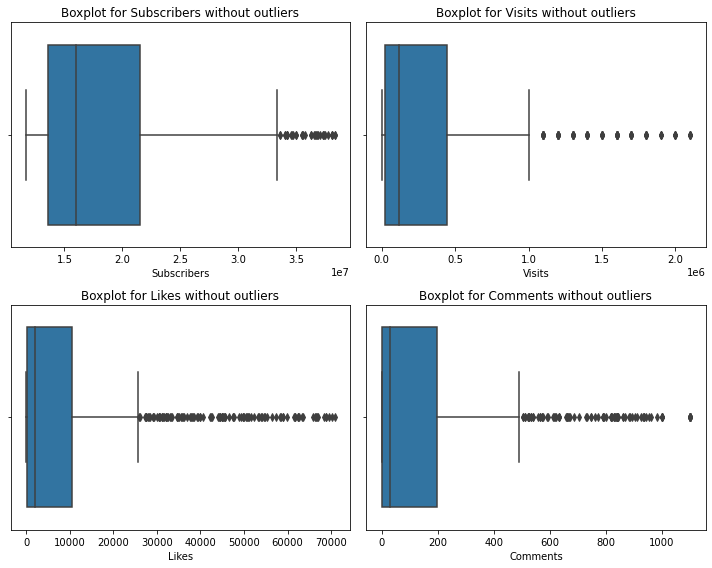

In [24]:
#handling Outliers
outliers = ['Subscribers', 'Visits', 'Likes', 'Comments']
fig, axes = plt.subplots(2,2, figsize = (10, 8))
axes = axes.flatten()

for i , col in enumerate(outliers):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 -Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data_without_outliers = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    
    sns.boxplot(x = data_without_outliers[col], ax =axes[i])
    axes[i].set_title(f'Boxplot for {col} without outliers')
    
plt.tight_layout()
plt.show()

In [25]:
df.shape

(1000, 9)

In [26]:
data_without_outliers.shape

(849, 9)

###  2. Trend Analysis

#### 1. Identify trends among the top YouTube streamers. Which categories are the most popular?

#### 2. Is there a correlation between the number of subscribers and the number of likes or comments?

In [27]:
df.columns

Index(['Rank', 'Username', 'Categories', 'Subscribers', 'Country', 'Visits',
       'Likes', 'Comments', 'Links'],
      dtype='object')

#### 2.1 Most Popular Categories

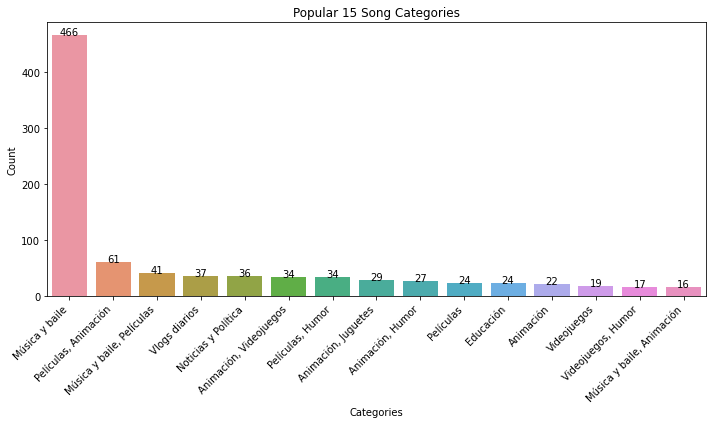

In [28]:

category_counts = df['Categories'].value_counts()

top_categories = category_counts.head(15)

top_categories_df = pd.DataFrame({'Category' : top_categories.index, 'Count' : top_categories.values})

plt.figure(figsize = (10, 6))
barplot = sns.barplot(x = 'Category', y = 'Count' , data = top_categories_df)
plt.xticks(rotation = 45, ha = 'right')
plt.title('Popular 15 Song Categories')
plt.xlabel('Categories')
plt.ylabel('Count')


for index , row in top_categories_df.iterrows():
    barplot.text(index, row['Count'], str(row['Count']), color='black', ha="center")
    
plt.tight_layout()
plt.show()



#### 2.2 Correlation 

In [35]:
#Correlation between Subscibers and Likes
column1 = 'Subscribers'
column2 = 'Likes'

correlation = df[column1].corr(df[column2])

print(f"Correlation between Subscribers and Likes: {correlation}")

Correlation between Subscribers and Likes: 0.21163868368008348


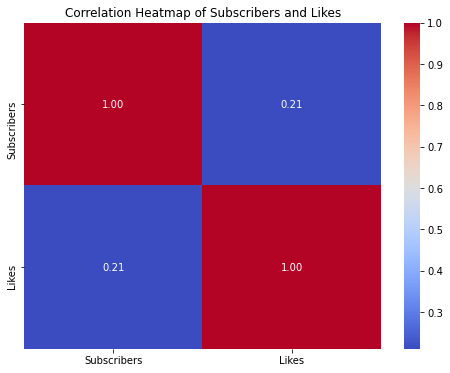

In [36]:
column1 = 'Subscribers'
column2 = 'Likes'

correlation_matrix = df[[column1, column2]].corr()

plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title(f'Correlation Heatmap of {column1} and {column2}')
plt.show()

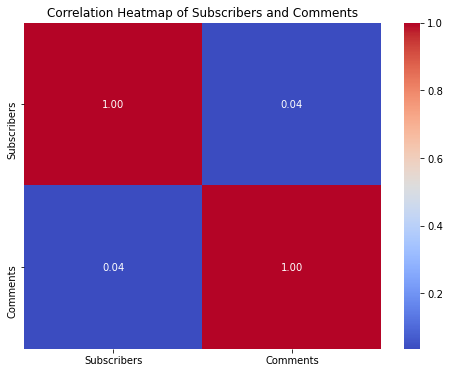

In [37]:
#Correlation between Subscribers and Comments
column1 = 'Subscribers'
column2 = 'Comments'

correlation_matrix = df[[column1, column2]].corr()

plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title(f'Correlation Heatmap of {column1} and {column2}')
plt.show()

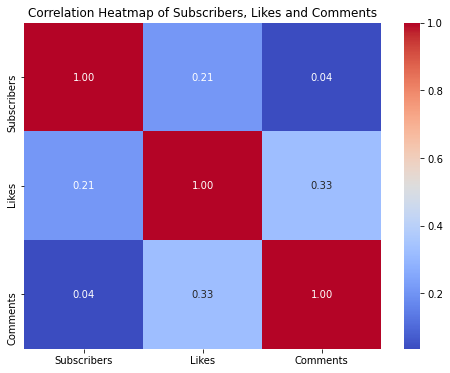

In [38]:
#Correlation between Subscribers , Likes and Comments
column1 = 'Subscribers'
column2 = 'Likes'
column3 = 'Comments'

columns_of_interest = df[[column1, column2, column3]]

correlation_matrix = columns_of_interest.corr()

plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title(f'Correlation Heatmap of {column1}, {column2} and {column3}')
plt.show()

### 3. Audience Study


#### Analyze the distribution of streamers audiences by country. Are there regional preferences for specific content categories?

In [49]:
country_list = df['Country'].value_counts()
country_list


Estados Unidos    293
India             241
Unknown           171
Brasil             64
México             58
Indonesia          38
Rusia              25
Tailandia          18
Colombia           16
Filipinas          13
Pakistán           11
Argentina           7
Egipto              5
Turquía             4
Arabia Saudita      4
España              4
Francia             4
Iraq                4
Bangladesh          3
Japón               3
Reino Unido         3
Perú                2
Argelia             2
Marruecos           2
Singapur            1
Ecuador             1
Somalia             1
Jordania            1
El Salvador         1
Name: Country, dtype: int64

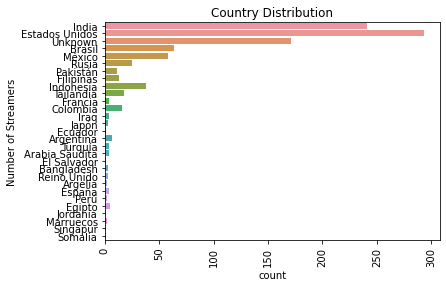

In [64]:
#Regional Distribution
sns.countplot(y='Country', data=df)
plt.title('Country Distribution')
plt.ylabel('Number of Streamers')
plt.xticks(rotation=90)
plt.show()

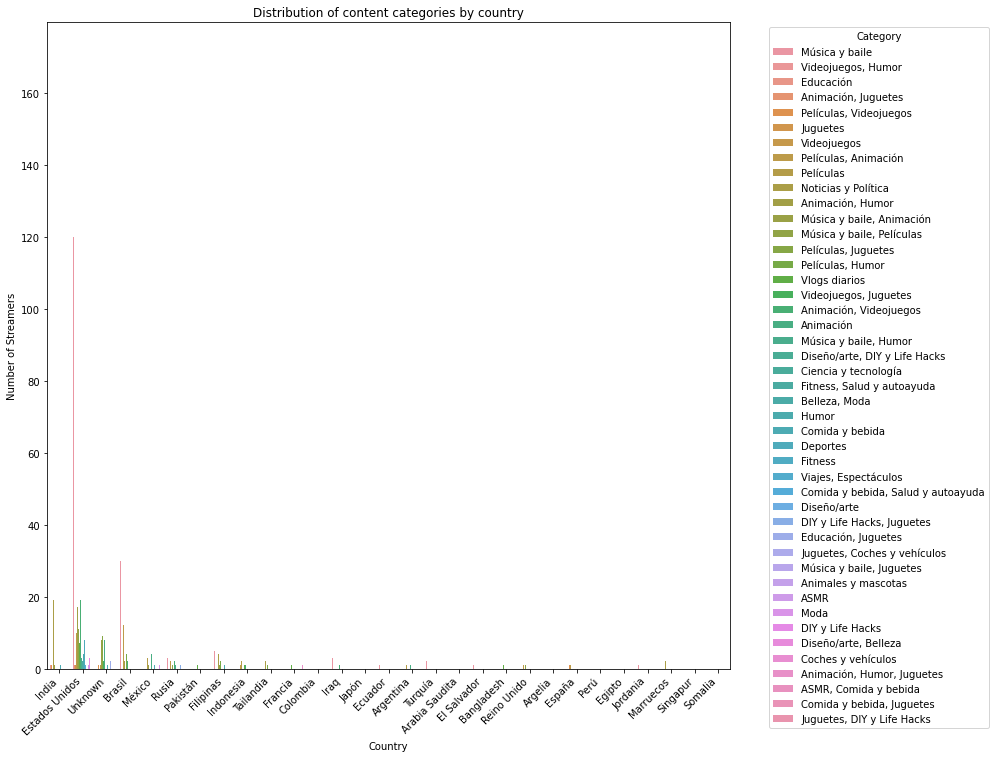

In [62]:

plt.figure(figsize = (14, 11))
sns.countplot(x='Country' , hue ='Categories',  data = df)
plt.title('Distribution of content categories by country')
plt.xlabel('Country')
plt.ylabel('Number of Streamers')
plt.xticks(rotation = 45, ha='right')
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

### 4. Performance Metrics

#### Calculate and visualize the average number of subscribers, visits, likes, and comments.
#### Are there patterns or anomalies in these metrics?

In [66]:
#Calulating averages
average_subscribers = df['Subscribers'].mean()
average_visits = df['Visits'].mean()
average_likes = df['Likes'].mean()
average_comments = df['Comments'].mean()

print(f'Average Subscribers : {average_subscribers}')
print(f'Average Visits : {average_visits}')
print(f'Average Likes : {average_likes}')
print(f'Average Comments : {average_comments}')


Average Subscribers : 21894400.0
Average Visits : 1209446.315
Average Likes : 53632.592
Average Comments : 1288.768


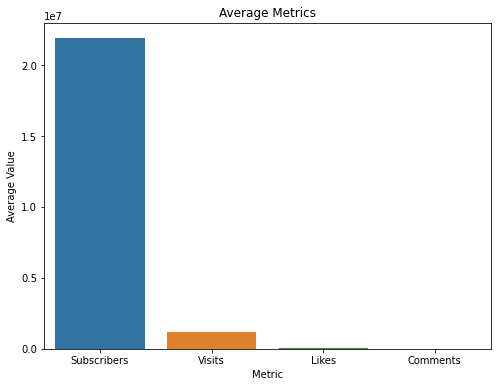

In [75]:
#Visualise Average Numbers
average_data = pd.DataFrame({
                                'Metric' : ['Subscribers', 'Visits', 'Likes', 'Comments'],
                                'Average': [average_subscribers, average_visits, average_likes, average_comments]
                            })

plt.figure(figsize=(8, 6))
ax = sns.barplot(x='Metric', y='Average' , data = average_data)
plt.title('Average Metrics')
plt.xlabel('Metric')
plt.ylabel('Average Value')

plt.show()

### 5. Content Categories

#### Explore the distribution of content categories. Which categories have the highest number of streamers?
#### Are there specific categories with exceptional performance metrics?

In [78]:
#Category wise count
category_list = df['Categories'].value_counts()
print(category_list)

Música y baile                        466
Películas, Animación                   61
Música y baile, Películas              41
Vlogs diarios                          37
Noticias y Política                    36
Animación, Videojuegos                 34
Películas, Humor                       34
Animación, Juguetes                    29
Animación, Humor                       27
Películas                              24
Educación                              24
Animación                              22
Videojuegos                            19
Videojuegos, Humor                     17
Música y baile, Animación              16
Ciencia y tecnología                   14
Comida y bebida                        12
Humor                                  10
Juguetes                               10
Películas, Juguetes                     9
Películas, Videojuegos                  8
Deportes                                8
Música y baile, Humor                   6
Juguetes, Coches y vehículos      

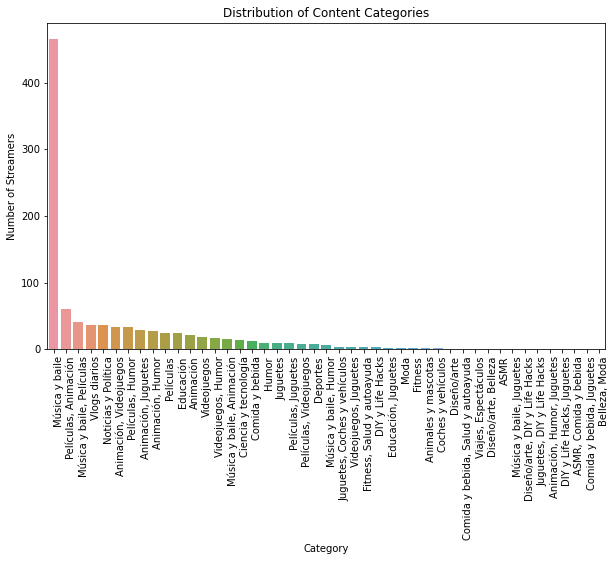

In [80]:
category_column = 'Categories'

#visualize the distribution of content categories using a count plot
plt.figure(figsize=(10,6))
sns.countplot(x=category_column, data = df, order=df[category_column].value_counts().index)
plt.title('Distribution of Content Categories')
plt.xlabel('Category')
plt.ylabel('Number of Streamers')
plt.xticks(rotation = 90, ha='right', wrap=True)
plt.show()

In [81]:
#Category with streamers above 10
category_above10 = category_list[category_list > 10]
print('Categories with streamers above 10')
print(category_above10)

Categories with streamers above 10
Música y baile               466
Películas, Animación          61
Música y baile, Películas     41
Vlogs diarios                 37
Noticias y Política           36
Animación, Videojuegos        34
Películas, Humor              34
Animación, Juguetes           29
Animación, Humor              27
Películas                     24
Educación                     24
Animación                     22
Videojuegos                   19
Videojuegos, Humor            17
Música y baile, Animación     16
Ciencia y tecnología          14
Comida y bebida               12
Name: Categories, dtype: int64


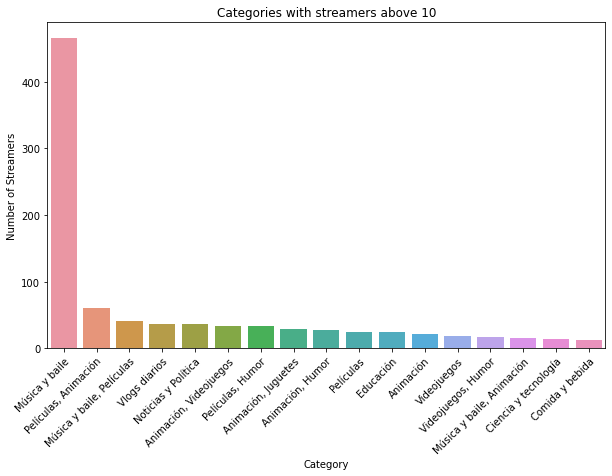

In [89]:
#Visualization 
plt.figure(figsize=(10,6))
sns.barplot(x=category_above10.index, y = category_above10.values)
plt.title('Categories with streamers above 10')
plt.xlabel('Category')
plt.ylabel('Number of Streamers')
plt.xticks(rotation = 45, ha='right', wrap=True)
plt.show()

### 6. Brands and Collaborations:

#### Analyze whether streamers with high performance metrics receive more brand collaborations and marketing campaigns.

In [97]:
df['Visits'] = df['Visits'].astype(int)
df['Subscribers'] = df['Subscribers'].astype(int)
df['Likes'] = df['Likes'].astype(int)
df['Comments'] = df['Comments'].astype(int)

In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Rank         1000 non-null   int64 
 1   Username     1000 non-null   object
 2   Categories   1000 non-null   object
 3   Subscribers  1000 non-null   int32 
 4   Country      1000 non-null   object
 5   Visits       1000 non-null   int32 
 6   Likes        1000 non-null   int32 
 7   Comments     1000 non-null   int32 
 8   Links        1000 non-null   object
dtypes: int32(4), int64(1), object(4)
memory usage: 54.8+ KB


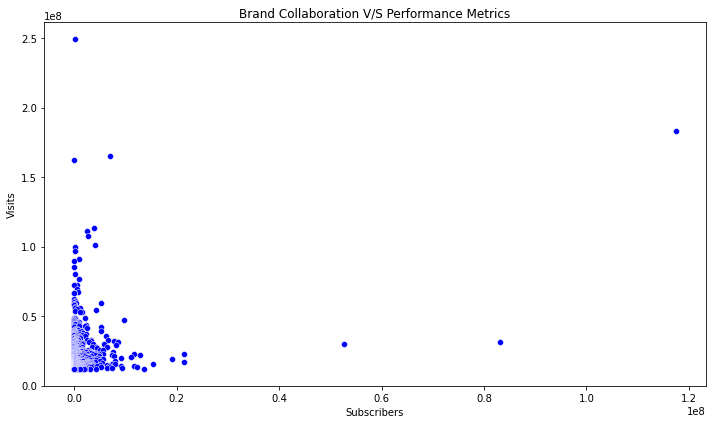

The correlation is between visits and brand collaboration: 0.24520315824598302


In [112]:
#dataset doesnt conatins collaboration and campaign columns to calculate this
#using availabel data
plt.figure(figsize = (10, 6))
sns.scatterplot(x = 'Visits' , y = 'Subscribers', data = df, color ='Blue')
plt.title('Brand Collaboration V/S Performance Metrics')
plt.xlabel('Subscribers')
plt.ylabel('Visits')
plt.tight_layout()
plt.show()

Correlation_visit_sub = (df['Visits'].corr(df['Subscribers']))
print('The correlation is between visits and brand collaboration:', Correlation_visit_sub)


### 7. Benchmarking:

#### Identify streamers with above-average performance in terms of subscribers, visits, likes, and comments.
#### Who are the top-performing content creators?

In [110]:
#calculating average values
average_subscribers = df['Subscribers'].mean()
average_visits = df['Visits'].mean()
average_likes = df['Likes'].mean()
average_comments = df['Comments'].mean()

#streamers with above average performance
top_performers = df[
                    (df['Subscribers'] > average_subscribers) &
                     (df['Visits'] > average_visits) &
                     (df['Likes'] > average_likes) & 
                     (df['Comments'] > average_comments)
                   ]

#display top performers 
top_performers[['Rank','Username', 'Subscribers', 'Visits', 'Likes', 'Comments']]

,Rank,Username,Subscribers,Visits,Likes,Comments
1,2,MrBeast,183500000,117400000,5300000,18500
5,6,PewDiePie,111500000,2400000,197300,4900
26,27,dudeperfect,59700000,5300000,156500,4200
34,35,TaylorSwift,54100000,4300000,300400,15000
39,40,JuegaGerman,48600000,2000000,117100,3000
43,44,A4a4a4a4,47300000,9700000,330400,22000
58,59,Mikecrack,43400000,2200000,183400,1800
62,63,KimberlyLoaiza,42100000,5300000,271300,16000
64,65,luisitocomunica,41100000,2500000,128900,1800
70,71,JessNoLimit,39600000,1300000,73500,1600


### 8. Content Recommendations:

#### Propose a system for enhancing content recommendations to YouTube users based on streamers categories and performance metrics.